# Latar Belakang

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Setelah kemarin kita mempersiapkan data sekaligus melakukan Cleansing, maka sekarang saatnya kita untuk membuat model yang tepat untuk memprediksi churn pelanggan.

# Library

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

1. Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
- read_csv() digunakan untuk membaca file csv
- replace() digunakan untuk mengganti nilai
- value_counts() digunakan untuk mengitung unik dari kolom
- drop() digunakan untuk menghapus
- describe() digunakan untuk melihat deskripsi datanya
- value_counts() digunakan untuk mengitung unik dari kolom
2. Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
- figure() digunakan untuk membuat figure gambar baru
- subplots()digunakan untuk membuat gambar dan satu set subplot
- title()digunakan untuk memberi judul pada gambar
- ylabel()digunakan untuk memberi label sumbu Y pada gambar
- xlabel()digunakan untuk memberi label sumbu Y pada gambar
- pie()digunakan untuk membuat pie chart
3. Seaborn membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.

- countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
- heatmap() Plot rectangular data as a color-encoded matrix
4. Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.

- LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
- train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
- LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
- RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
- confusion_matrix() digunakan untuk membuat confusion matrix
- classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model
5. Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)

- XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier
6. Pickle mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.

- dump() digunakan untuk menyimpan

## Data Load

In [319]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
from pathlib import Path

In [320]:
# Import Library
import pandas as pd

In [321]:
# Import dataset
df_load = pd.read_csv('data/dqlab_telco.csv')

# Cek Dataset
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Memahami Data

In [322]:
df_load.shape

(7113, 22)

In [323]:
print(df_load.dtypes)

UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [324]:
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7014.000000,7087.000000,7098.000000
mean,32.749358,67.018985,2306.582650
std,25.206376,117.396646,2575.212013
min,0.000000,0.000000,19.000000
25%,9.000000,36.100000,402.925000
50%,30.000000,70.450000,1400.700000
75%,56.000000,89.900000,3801.600000
max,500.000000,9000.000000,80000.000000


In [325]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Variable gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Variable SeniorCitizen
0    5962
1    1151
Name: SeniorCitizen, dtype: int64

Unique Values Count Variable Partner
No     3676
Yes    3437
Name: Partner, dtype: int64

Unique Values Count Variable Dependents
No     4978
Yes    2115
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Variable PhoneService
Yes    6423
No      690
Name: PhoneService, dtype: int64

Unique Values Count Variable MultipleLines
No                  3428
Yes                 2995
No phone service     690
Name: MultipleLines, dtype: int64

Unique Values Count Variable InternetService
Fiber optic    3125
DSL            2451
No             1537
Name: InternetService, dtype: int64

Unique Values Count Variable OnlineSecurity
No                     3531
Yes                    2045
No internet service    1537
Name: OnlineSecurity, dtype: int64

Unique V

In [326]:
print("Nilai      Jumlah")
print(df_load["Churn"].value_counts())

Nilai      Jumlah
No       5195
Yes      1866
Churn       9
Name: Churn, dtype: int64


In [327]:
df_load.dtypes

UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data Cleansing

In [328]:
# Show the number of rows and columns
df_load.shape

(7113, 22)

In [329]:
# Show top 5 data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [330]:
# Number of unique IDs
df_load.customerID.nunique()

7017

In [331]:
# Filter id sesuai format:
# - panjang karakter 11-12.
# - Hanya berisi karakter angka
# - Karakter awal dimulai dengan angka 45

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Banyak data hasil filter : ', df_load['customerID'].count())

Banyak data hasil filter :  7006


In [332]:
# Filter ID yang redundan

# hapus baris duplikat
df_load.drop_duplicates()
# hapus id duplikat
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('banyak data hasil filter : ',df_load['customerID'].count())

banyak data hasil filter :  6993


In [333]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6993 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6993 non-null   int64  
 1   customerID        6993 non-null   object 
 2   gender            6993 non-null   object 
 3   SeniorCitizen     6993 non-null   int64  
 4   Partner           6993 non-null   object 
 5   Dependents        6993 non-null   object 
 6   tenure            6894 non-null   float64
 7   PhoneService      6993 non-null   object 
 8   MultipleLines     6993 non-null   object 
 9   InternetService   6993 non-null   object 
 10  OnlineSecurity    6993 non-null   object 
 11  OnlineBackup      6993 non-null   object 
 12  DeviceProtection  6993 non-null   object 
 13  TechSupport       6993 non-null   object 
 14  StreamingTV       6993 non-null   object 
 15  StreamingMovies   6993 non-null   object 
 16  Contract          6993 non-null   object 


**Conclusion**

The validity of the customer ID Number is needed to ensure that the data we collect is correct. Based on these results, there are differences in the number of ID numbers from the first data loaded to the final result. The number of rows of data when loaded for the first time was 7113 rows and 22 columns with 7017 Unique IDs. Then after checking the validity of the customer ID, there are 6993 rows of data left

### Hapus fitur yang tidak digunakan

In [334]:
df_load = df_load.drop(['customerID','UpdatedAt', 'Dependents', 'MultipleLines', 'DeviceProtection',
                           'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod', 'OnlineSecurity',
                           'OnlineBackup'], axis=1)
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,DSL,No,Yes,29.85,29.85,No
4727,Male,0,Yes,60.0,Yes,No,No internet service,Yes,20.50,1198.80,No
4738,Male,0,No,5.0,Yes,Fiber optic,Yes,No,104.10,541.90,Yes
4737,Female,0,Yes,72.0,Yes,Fiber optic,Yes,Yes,115.50,8312.75,No
4736,Female,0,Yes,56.0,Yes,DSL,Yes,No,81.25,4620.40,No


# Handling Missing Values with Removing Rows

In [335]:
print('\nJumlah missing value setiap kolom :')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah missing value setiap kolom :
tenure              99
Churn               43
MonthlyCharges      26
TotalCharges        15
gender               0
SeniorCitizen        0
Partner              0
PhoneService         0
InternetService      0
StreamingTV          0
PaperlessBilling     0
dtype: int64


Next, we will remove Rows from undetected data whether it churns or not. It is assumed that the data modeller only wants to receive data that is correct with a churn flag or not.

In [336]:
print('Total missing values data from the Churn column',df_load['Churn'].isnull().sum())

Total missing values data from the Churn column 43


In [337]:
# Menghapus missing values pada target Churn
df_load.dropna(subset=['Churn'],inplace=True)
print('Banyak data : ',df_load.shape)

Banyak data :  (6950, 11)


# Handling Missing Values by Filling Certain Values

It is assumed that the modeller data requests filling in missing values with the following criteria:
- Tenure the data modeller asks for each rows that have missing values for the length of subscription to be filled with 11
- Numeric variables other than tenure are filled with the median of each of these variables

Are there still missing values data?

In [338]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nThe number of missing values for each column is:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

The number of missing values for each column is:
tenure              99
MonthlyCharges      26
TotalCharges        15
gender               0
SeniorCitizen        0
Partner              0
PhoneService         0
InternetService      0
StreamingTV          0
PaperlessBilling     0
Churn                0
dtype: int64


In [339]:
# Handling missing values Tenure fill with 11
# tenure_mean 
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    print(median)
    df_load[col_name].fillna(median, inplace=True)

70.45
1400.85


In [340]:
print('\nThe number of Missing Values after imputer the data are:')
print(df_load.isnull().sum().sort_values(ascending=False))


The number of Missing Values after imputer the data are:
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
InternetService     0
StreamingTV         0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Conclusion**

After we analyzed it further, it turned out that there were still Missing Values from the data that we validated the customer ID Number. Missing values are in the Churn, tenure, MonthlyCharges & TotalCharges columns. After we handle it by deleting rows and filling in certain values, it is proven that there are no more missing values in the data, as evidenced by the number of missing values for each variable which is worth 0. Next, we will handle the outliers.

# Detect Outliers by creating Boxplot

In [341]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
# Melihat distribusi data
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


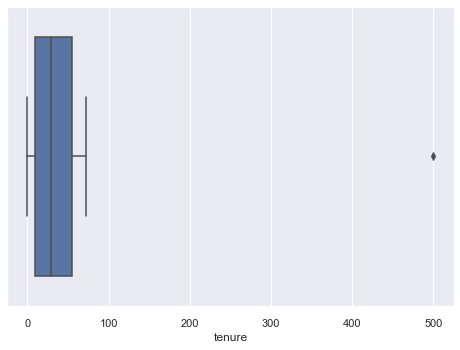

In [343]:
plt.figure() # to create a new figure
sns.boxplot(x=df_load['tenure'])
plt.show()

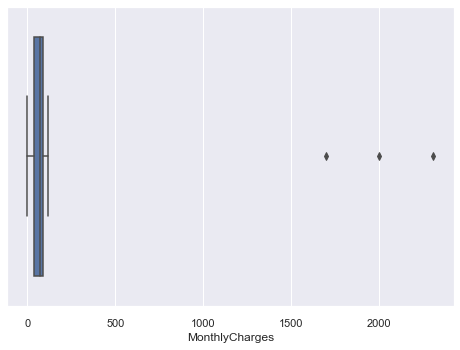

In [344]:
plt.figure() # to create a new figure
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()


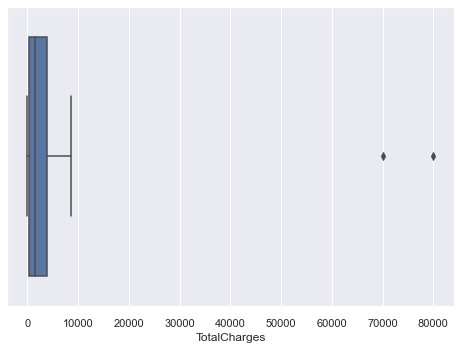

In [345]:
plt.figure() # to create a new figure
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Handling Outliers

Next, we will handling the outliers using the interquartile range (IQR) method.

In [346]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

# Specifies the Minimum and Maximum data values to be tolerated
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('The Maximum Value of each Variable is: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nThe Minimum Value of each Variable is: ')
print(minimum)

The Maximum Value of each Variable is: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

The Minimum Value of each Variable is: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [347]:
# Mengubah nilai outlier
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

C:\Users\RIZALDI\AppData\Local\Temp\ipykernel_19448\3815235308.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\RIZALDI\AppData\Local\Temp\ipykernel_19448\3815235308.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


In [348]:
# Distribusi data setelah handling outlier
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


**Conclusion**

From the three boxplots with the variables 'tenure', 'MonthlyCharges' & 'TotalCharges', it is clear that there are outliers. This can be identified from the points that are far from the boxplot image. Then if we look at the data distribution from the max column there is also a very high value.

Then the outlier value is handled by changing the value to the Maximum & Minimum value of the interquartile range (IQR). After handling the outliers, and looking at the data distribution, it appears that there are no more outliers.

# Standardize Values

In [349]:
# Loop for Detect Nonstandard Values

for col_name in list(['gender',
                      'SeniorCitizen',
                      'Partner',
                      'PhoneService',
                      'InternetService',
                      'StreamingTV',
                      'PaperlessBilling',
                      'Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Standardized  Variable StreamingTV
No                     2774
Yes                    2671
No internet service    1505
Name: StreamingTV, dtype: int64

Unique Values Count Before Standardized  Variable PaperlessBilling
Yes    4114
No     2836
Name: PaperlessBilling, dtype: int64

Unique Values Count 

In [350]:
# Standardizing Categorical Variables

# Use the replace () function to standardize values
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Fiber optic', 'DSL', 'No internet service'],
                          ['Female','Male','Yes','Yes', 'Yes', 'No'])

# Loop
for col_name in list(['gender', 'Churn', 'InternetService', 'StreamingTV']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64

Unique Values Count After Standardized Variable InternetService
Yes    5445
No     1505
Name: InternetService, dtype: int64

Unique Values Count After Standardized Variable StreamingTV
No     4279
Yes    2671
Name: StreamingTV, dtype: int64


**Conclusion**

When we look further from the number of unique values of each categorical variable, it is clear that there are several variables that are not standardized. The variables are:
* Gender (Female, Male, *Wanita, Laki-Laki*), which can be standardized as (Female, Male) because it has the same meaning.
* Dependents (Yes, No, *Iya*), which can be standardized to (Yes, No) because they have the same meaning.
* Churn (Yes, No, Churn), which can be standardized as (Yes, No) because it has the same meaning.

After we have standardized the value, and we look back at the data form, it is well standardized for its unique value.

In [351]:
df_load


,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,Yes,No,Yes,29.85,29.85,No
4727,Male,0,Yes,60.0,Yes,No,No,Yes,20.50,1198.80,No
4738,Male,0,No,5.0,Yes,Yes,Yes,No,104.10,541.90,Yes
4737,Female,0,Yes,72.0,Yes,Yes,Yes,Yes,115.50,8312.75,No
4736,Female,0,Yes,56.0,Yes,Yes,Yes,No,81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...
2363,Male,0,No,1.0,Yes,Yes,No,Yes,44.75,44.75,No
2366,Female,1,No,1.0,Yes,Yes,No,Yes,70.15,70.15,Yes
2367,Female,0,No,1.0,Yes,Yes,Yes,Yes,85.55,85.55,Yes
2368,Female,0,Yes,72.0,Yes,Yes,Yes,Yes,117.15,8529.50,No


cleaned_df = df_load.drop(['customerID','UpdatedAt', 'Dependents', 'MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup'], axis=1)

In [352]:
#import matplotlib dan seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(style='darkgrid')

## Visualisasi Persentase Churn

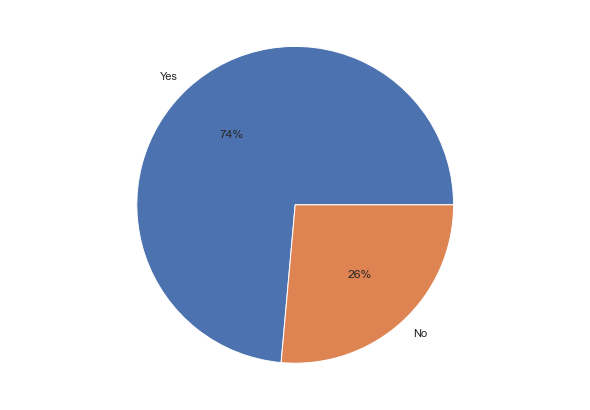

In [353]:
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

## Exploratory Dara Analysis (EDA) Variabel Numerik

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

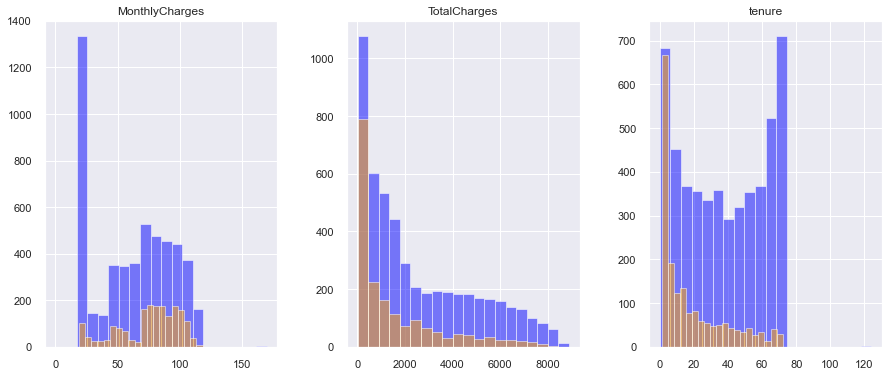

In [354]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## Exploratory Data Analysis (EDA) Variabel Kategorik

Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

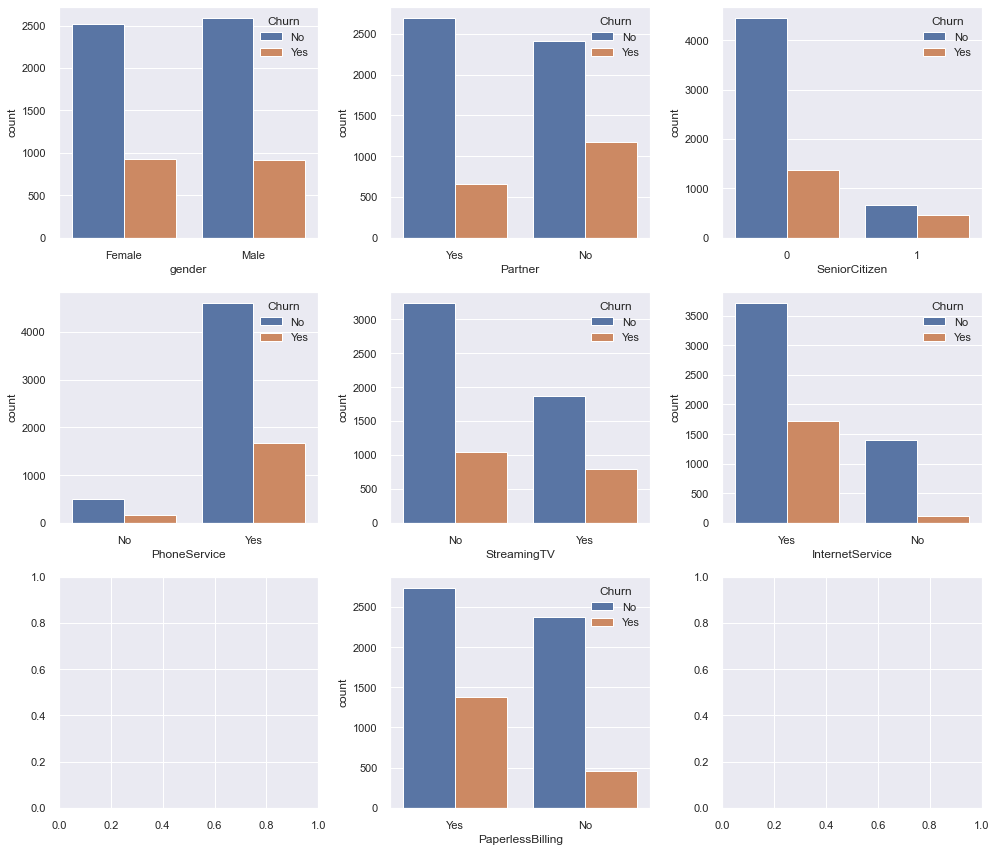

In [355]:
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

## Kesimpulan

In [356]:
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'InternetService', 'StreamingTV', 'PaperlessBilling', 'Churn']):
    print(df_load[col_name].value_counts())

Male      3505
Female    3445
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
Yes    6281
No      669
Name: PhoneService, dtype: int64
Yes    5445
No     1505
Name: InternetService, dtype: int64
No     4279
Yes    2671
Name: StreamingTV, dtype: int64
Yes    4114
No     2836
Name: PaperlessBilling, dtype: int64
No     5114
Yes    1836
Name: Churn, dtype: int64


## Encoding Data



In [357]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in df_load.columns:
	if df_load[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	df_load[column] = LabelEncoder().fit_transform(df_load[column])
print(df_load)

      gender  SeniorCitizen  Partner  tenure  PhoneService  InternetService  \
0          0              0        1     1.0             0                1   
4727       1              0        1    60.0             1                0   
4738       1              0        0     5.0             1                1   
4737       0              0        1    72.0             1                1   
4736       0              0        1    56.0             1                1   
...      ...            ...      ...     ...           ...              ...   
2363       1              0        0     1.0             1                1   
2366       0              1        0     1.0             1                1   
2367       0              0        0     1.0             1                1   
2368       0              0        1    72.0             1                1   
2369       1              0        0    64.0             1                1   

      StreamingTV  PaperlessBilling  MonthlyCharges

C:\Users\RIZALDI\AppData\Local\Temp\ipykernel_19448\3823931173.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_load[column].dtype == np.number: continue


In [358]:
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'InternetService', 'StreamingTV', 'PaperlessBilling', 'Churn']):
    print(df_load[col_name].value_counts())

1    3505
0    3445
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
0    3591
1    3359
Name: Partner, dtype: int64
1    6281
0     669
Name: PhoneService, dtype: int64
1    5445
0    1505
Name: InternetService, dtype: int64
0    4279
1    2671
Name: StreamingTV, dtype: int64
1    4114
0    2836
Name: PaperlessBilling, dtype: int64
0    5114
1    1836
Name: Churn, dtype: int64


In [359]:
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1.0,0,1,0,1,29.85,29.85,0
4727,1,0,1,60.0,1,0,0,1,20.50,1198.80,0
4738,1,0,0,5.0,1,1,1,0,104.10,541.90,1
4737,0,0,1,72.0,1,1,1,1,115.50,8312.75,0
4736,0,0,1,56.0,1,1,1,0,81.25,4620.40,0


## Splitting Dataset

In [360]:
from sklearn.model_selection import train_test_split

# x = fitur, y = target
X = df_load.drop('Churn', axis = 1)
y = df_load['Churn']

# Splitting data train dan data test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lihat hasil splitting data
print('Jumlah x_train:', x_train.shape,', sedangkan jumlah y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah  x_test adalah:', x_test.shape,', sedangkan jumlah y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah x_train: (5560, 10) , sedangkan jumlah y_train adalah: (5560,)
Persentase Churn di data Training adalah:
0    0.735612
1    0.264388
Name: Churn, dtype: float64

Jumlah  x_test adalah: (1390, 10) , sedangkan jumlah y_test adalah: (1390,)
Persentase Churn di data Testing adalah:
0    0.736691
1    0.263309
Name: Churn, dtype: float64


## Kesimpulan

Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

# Decision Tree

In [361]:
from sklearn import tree

t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(x_train, y_train)
t

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [362]:
# visualize tree
import graphviz

dot_data = tree.export_graphviz(t, 
                                out_file="Pohon_keputusan.dot", 
                                label="all", 
                                impurity=False, 
                                proportion=True,
                                feature_names=list(x_train), 
                                class_names=["Churn", "No Churn"],
                                filled=True, 
                                rounded=True)
graph = graphviz.Source(dot_data)

In [195]:
read = plt.imread('graphviz.png')
plt.imshow(read)

FileNotFoundError: [Errno 2] No such file or directory: 'graphviz.png'

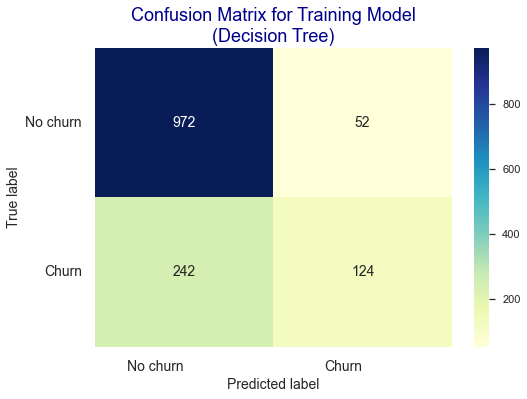

In [363]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
y_test_pred = t.predict(x_test)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [364]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = t.predict(x_test)
# Print classification report
print('Classification Report Training Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1024
           1       0.70      0.34      0.46       366

    accuracy                           0.79      1390
   macro avg       0.75      0.64      0.66      1390
weighted avg       0.78      0.79      0.76      1390

